In [34]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [35]:
def loadtxt(file: Path) -> np.ndarray:
    if not file.exists():
        raise FileNotFoundError(f"File not found: {file}")
    return np.loadtxt(file)

def plot(ax: plt.Axes, dir: Path, filename:str, ylabel: str, title: str) -> None:
    y = loadtxt(dir / Path(filename))
    x = loadtxt(dir / Path("x.txt"))

    ax.plot(x, y, 'k.')
    ax.set_xlabel("x")
    ax.set_ylabel(ylabel)
    ax.set_title(title, fontsize=10)

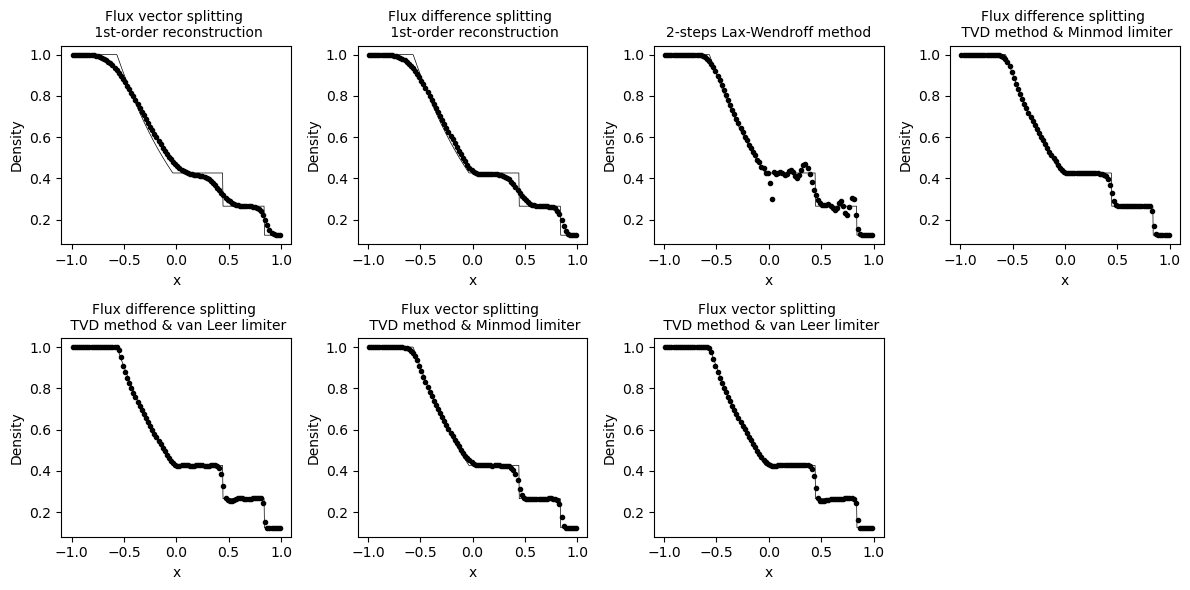

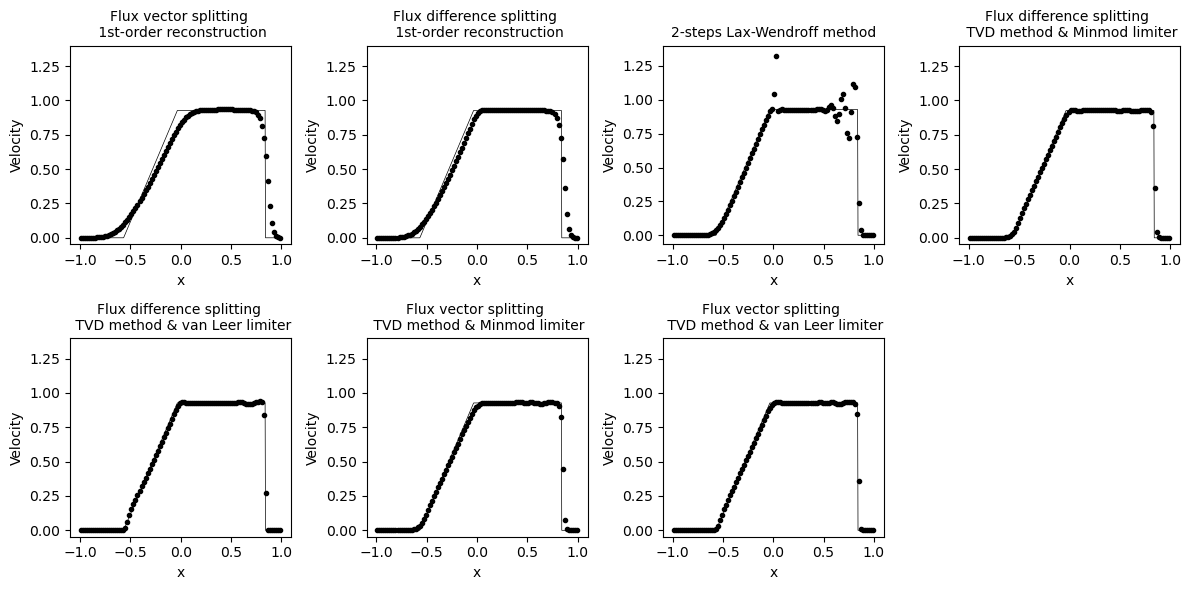

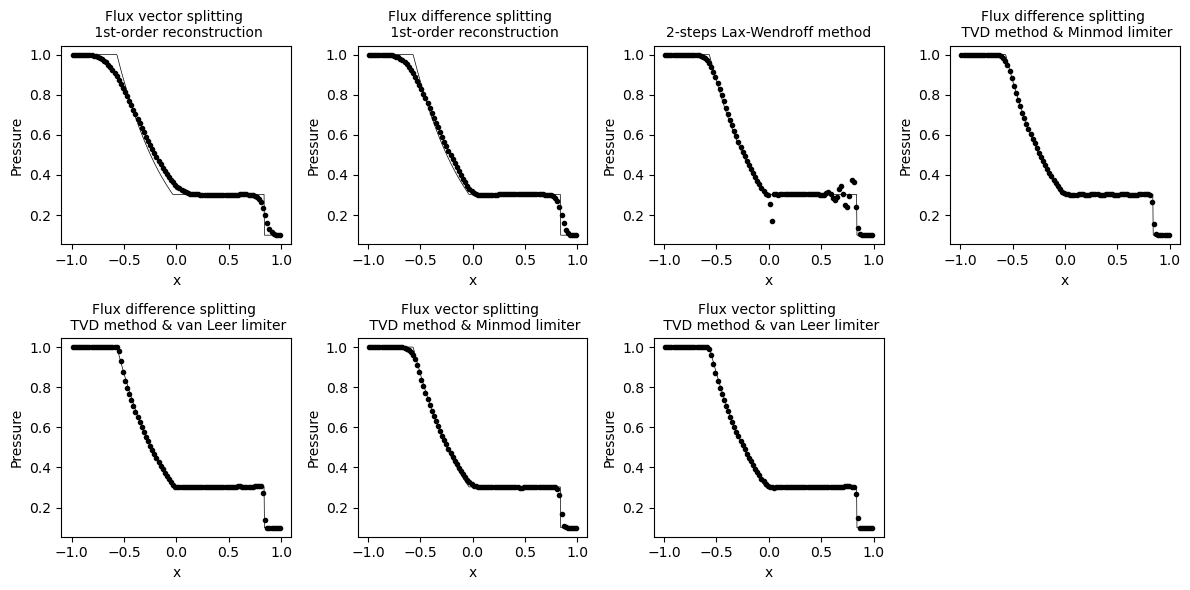

In [36]:
simulators = ["sw_1st_order", "roe_1st_order", "lax_wendroff", "roe_tvd_minmod", "roe_tvd_vanleer",
    "sw_tvd_minmod", "sw_tvd_vanleer"]
titles = [
    "Flux vector splitting \n 1st-order reconstruction",
    "Flux difference splitting \n 1st-order reconstruction",
    "2-steps Lax-Wendroff method",
    "Flux difference splitting \n TVD method & Minmod limiter",
    "Flux difference splitting \n TVD method & van Leer limiter",
    "Flux vector splitting \n TVD method & Minmod limiter",
    "Flux vector splitting \n TVD method & van Leer limiter"
]

rho_exact = np.loadtxt("exact_solution/rho.txt")
u_exact = np.loadtxt("exact_solution/u.txt")
p_exact = np.loadtxt("exact_solution/p.txt")
x_exact = np.loadtxt("exact_solution/x.txt")

fig1 = plt.figure(figsize=(12, 6))
for i, (simulator, title) in enumerate(zip(simulators, titles), 1):
    ax = fig1.add_subplot(2, 4, i)
    ax.plot(x_exact, rho_exact, 'k-', linewidth=0.5)
    plot(ax, Path(f"result/{simulator}"), "rho.txt", "Density", title)
fig1.tight_layout()

fig2 = plt.figure(figsize=(12, 6))
for i, (simulator, title) in enumerate(zip(simulators, titles), 1):
    ax = fig2.add_subplot(2, 4, i)
    ax.plot(x_exact, u_exact, 'k-', linewidth=0.5)
    plot(ax, Path(f"result/{simulator}"), "u.txt", "Velocity", title)
    ax.set_ylim(top=1.4)
fig2.tight_layout()

fig3 = plt.figure(figsize=(12, 6))
for i, (simulator, title) in enumerate(zip(simulators, titles), 1):
    ax = fig3.add_subplot(2, 4, i)
    ax.plot(x_exact, p_exact, 'k-', linewidth=0.5)
    plot(ax, Path(f"result/{simulator}"), "p.txt", "Pressure", title)
fig3.tight_layout()

fig1.savefig("density.png")
fig2.savefig("velocity.png")
fig3.savefig("pressure.png")